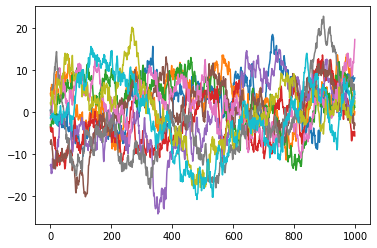

In [1]:
#1b
import numpy as np
import statistics as st
import matplotlib.pyplot as pl
a=0.99
N=2000
nreps=10
xt=np.zeros((nreps,2000))
for k in range(nreps):
  x=np.zeros((2000))
  w = np.random.randn(N) 
  x[0]=w[0]
  for n in range(1,N):
   # Generate 2000 sample white noise
    x[n]=a*x[n-1]+w[n]
  xt[k,:]=x
  pl.plot(xt[k,1000:])    
    

In [2]:
#1c
var=np.zeros(nreps)
for k in range(nreps):
    var[k]=st.variance(xt[k])
print(var)
print(a*np.mean(var))


y=np.zeros((2000))
for n in range(1,N):
        y[n-1]=x[n]*x[n-1]
varmean=a*np.mean(y)
print(varmean)
#This is equal to the calcualtion from a as implemented the notebook paper

[43.08661906 26.50699279 39.49610871 36.2948955  43.49515698 55.10921653
 31.52814488 52.07530849 49.47434508 51.97625363]
42.475261123574846
52.06255946119873


In [3]:
#1d
def ar1(a,Nexamples,Nsamps):
    xt=np.zeros((Nexamples,Nsamps))
    for k in range(Nexamples):
      x=np.zeros((Nsamps))
      w = np.random.randn(N) 
      x[0]=w[0]
      for n in range(1,N):
       # Generate 2000 sample white noise
        x[n]=a*x[n-1]+w[n]
      std=np.std(x)
      xt[k,:]=x/std
      
      pl.plot(xt[k,1000:]) 
    avgvar=np.mean(np.var(xt[:],axis=1))
    print(avgvar)
    return xt,avgvar

1.0
1.0


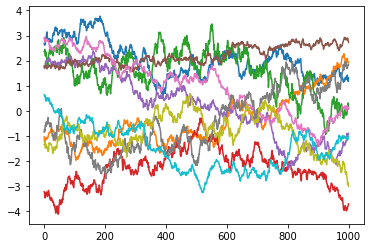

1.0


(array([[ 2.70347468e-02, -1.03068352e-01,  1.38118462e-02, ...,
         -1.79644028e+00, -1.31689349e+00, -1.10105363e+00],
        [ 6.83852889e-02,  1.93145004e-01,  2.72036467e-01, ...,
         -1.06918823e+00, -9.45987292e-01, -7.76599465e-01],
        [-5.98087713e-04, -2.12638703e-03,  1.01456438e-01, ...,
          8.66453951e-01,  7.08368681e-01,  6.69647900e-01],
        ...,
        [ 1.83378869e-01,  1.23621631e-01,  2.96915932e-01, ...,
          5.88376344e-01,  5.88510638e-01,  8.05509349e-01],
        [-2.65772953e-01, -1.91500774e-01, -8.53382828e-02, ...,
          2.87502746e-01,  2.52524141e-01,  1.63494572e-01],
        [-1.11657845e-01, -1.72882460e-01, -2.26317602e-01, ...,
         -5.68733853e-01, -6.71620236e-01, -7.20975263e-01]]),
 1.0)

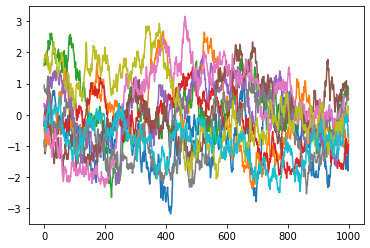

In [4]:
#1e
aa,var=ar1(0.999,10,2000)
print(var)
pl.show()
ar1(0.99,10,2000)

# 1e
0.999 is more smoother
yes it agrees because Rxx(0) is equivalent to the calucalted

1.0
62


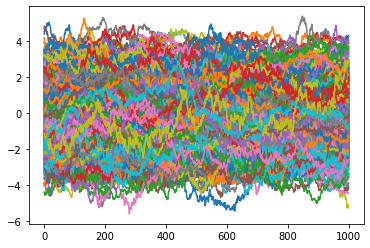

In [5]:
aa,var=ar1(0.999,1000,2000)

total=0
for a in (aa):
    count=0
    if(any(aa>4 for aa in a)):
        count=1
    total+=count
print(total)

# 2a
The average score is 50*1/3=16.7


In [6]:
import scipy.stats as sc
a=np.arange(0,50)
t,alpha=sc.ttest_1samp(a, 16.7)
print(alpha/2)

0.00021076401751743764


In [9]:
#2b
from scipy.stats import binom
binom.ppf(0.95,50,1/3)

22.0

#2c
(1-0.05*10^-15)*50=49.999

# 3a
50%*90%=45%

# 3b
5000*90%=4500

# 3c 
10,000 * 1%*90%=90


# 3d
10,000 x 1% x 90%=90
90 x 90%=81 ......for testing twice
81 x 90%=72.9 ......for testing thrice

The variance decreases as multiple trials are taken. Hence, when we test once, we have var. When we test twice, we have variance/2 and when we test 3 times, we have var/3